# Pandas practice


## Part 1)
#### Source: https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

In this blog post, I will show the different ways to select subsets of data in Pandas using [], .loc, .iloc, .at, and .iat.  I will be using the wine quality dataset hosted on the UCI website. This data record 11 chemical properties (such as the concentrations of sugar, citric acid, alcohol, pH etc.) of thousands of red and white wines from northern Portugal, as well as the quality of the wines, recorded on a scale from 1 to 10. We will only look at the data for red wine.

In [40]:
import pandas as pd 
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [41]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Different ways to select columns

In [42]:
"""
I rename the columns to make it easier for me call the column names for future operations.
"""
wine_df.columns = ['fixed_acidity', 'volatile_acidity',
                   'citric_acid', 'residual_sugar', 'chlorides', 
                   'free_sulfur_dioxide', 'total_sulfur_dioxide',
                   'density','pH','sulphates', 'alcohol', 'quality' ]

In [43]:
"""
Selecting a single column

To select the first column 'fixed_acidity', you can pass the column name as a string to the indexing operator.
"""

wine_df['fixed_acidity'].head()

0     7.4
1     7.8
2     7.8
3    11.2
4     7.4
Name: fixed_acidity, dtype: float64

In [44]:
wine_df.fixed_acidity.head()

0     7.4
1     7.8
2     7.8
3    11.2
4     7.4
Name: fixed_acidity, dtype: float64

## Selecting multiple columns

In [45]:
"""
To select multiple columns, you can pass a list of column names to the indexing operator.


Alternatively, you can assign all your columns to a list variable and pass that variable to the indexing operator.

"""

wine_four = wine_df[['fixed_acidity', 'volatile_acidity','citric_acid', 'residual_sugar']]

In [46]:
cols = ['fixed_acidity', 'volatile_acidity','citric_acid', 'residual_sugar']
wine_list_four = wine_four[cols]

In [47]:
wine_list_four.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar
0,7.4,0.70,0.00,1.9
1,7.8,0.88,0.00,2.6
2,7.8,0.76,0.04,2.3
3,11.2,0.28,0.56,1.9
4,7.4,0.70,0.00,1.9


## Selecting columns using "select_dtypes" and "filter" methods

In [48]:
"""
To select columns using select_dtypes method, you should first find out the number of columns for each data types.
"""
wine_df.get_dtype_counts()

c:\users\dalciana\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  after removing the cwd from sys.path.


float64    11
int64       1
dtype: int64

In [49]:
"""
In this example, there are 11 columns that are float and one column that is an integer.
To select only the float columns,  use wine_df.select_dtypes(include = ['float']). 

The select_dtypes method takes in a list of datatypes in its include parameter. 
The list values can be a string or a Python object.

You can also use the filter method to select columns based on the column names or index labels.

"""
wine_df.select_dtypes(include = ['float']).head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [50]:


wine_df.select_dtypes(include=['number']).head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
wine_df.filter(like='acid').head()

,fixed_acidity,volatile_acidity,citric_acid
0,7.4,0.70,0.00
1,7.8,0.88,0.00
2,7.8,0.76,0.04
3,11.2,0.28,0.56
4,7.4,0.70,0.00


In [52]:
"""
In the above example, the filter method returns columns that contain the exact string 'acid'.

The like parameter takes a string as an input and returns columns that has the string.

You can use regular expressions with the regex parameter in the filter method.
"""


wine_df.filter(regex='\d').head()

""
0
1
2
3
4


In [53]:
wine_df.rename(columns={'pH':'pH_5', 'quality': 'quality_6' }, inplace=True)
wine_df.filter(regex='\d').head()

,pH_5,quality_6
0,3.51,5
1,3.20,5
2,3.26,5
3,3.16,6
4,3.51,5


In [54]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH_5,sulphates,alcohol,quality_6
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
wine_df.filter(items=['fixed_acidity', 'volatile_acidity']).head()

,fixed_acidity,volatile_acidity
0,7.4,0.70
1,7.8,0.88
2,7.8,0.76
3,11.2,0.28
4,7.4,0.70


In [56]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH_5,sulphates,alcohol,quality_6
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Changing the order of your columns

In [57]:
wine_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH_5', 'sulphates', 'alcohol', 'quality_6'],
      dtype='object')

In [58]:
group_1 = ['pH_5','sulphates','alcohol', 'quality_6']
group_2 =['chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density']
group_3 = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar']

In [59]:
"""
wine_df.columns shows all the column names. 
I organize the names of my columns into three list variables, 
and concatenate all these variables to get the final column order.
"""
new_cols = group_1+group_2+group_3

In [60]:
wine_df.columns 

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH_5', 'sulphates', 'alcohol', 'quality_6'],
      dtype='object')

In [61]:
""" 
I use the Set module to check if new_cols contains all the columns from the original.

Then, I pass the new_cols variable to the indexing operator 
and store the resulting DataFrame in a variable "wine_df_2" .

Now, the wine_df_2 DataFrame has the columns in the order that I wanted.
"""

set(wine_df.columns) == set(new_cols) 

True

In [62]:
wine_df_2 = wine_df[new_cols]

In [63]:
wine_df_2.head()

,pH_5,sulphates,alcohol,quality_6,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,fixed_acidity,volatile_acidity,citric_acid,residual_sugar
0,3.51,0.56,9.4,5,0.076,11.0,34.0,0.9978,7.4,0.70,0.00,1.9
1,3.20,0.68,9.8,5,0.098,25.0,67.0,0.9968,7.8,0.88,0.00,2.6
2,3.26,0.65,9.8,5,0.092,15.0,54.0,0.9970,7.8,0.76,0.04,2.3
3,3.16,0.58,9.8,6,0.075,17.0,60.0,0.9980,11.2,0.28,0.56,1.9
4,3.51,0.56,9.4,5,0.076,11.0,34.0,0.9978,7.4,0.70,0.00,1.9


In [64]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH_5,sulphates,alcohol,quality_6
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



## Selecting rows using .iloc and loc


In [68]:
"""
Now, let's see how to use .iloc and loc for selecting rows from our DataFrame.

To illustrate this concept better, I remove all the duplicate rows from the "density" column 
and change the index of wine_df DataFrame to 'density'.
"""


"""
Let's see first how many different values of observatons we have . 
Pandas dataframe. nunique() function return Series with number of distinct observations
over requested axis. 
If we set the value of axis to be 0, then it finds the total number of unique observations over the index axis.
(Default axis=0, i.e. row-wise).
""" 
wine_df.nunique()

fixed_acidity            85
volatile_acidity        102
citric_acid              68
residual_sugar           61
chlorides                97
free_sulfur_dioxide      52
total_sulfur_dioxide    111
density                 436
pH_5                     79
sulphates                64
alcohol                  52
quality_6                 6
dtype: int64

In [66]:
wine_df = wine_df.drop_duplicates(subset='density')

In [67]:
wine_df.shape #436 unique values in the density column 

(436, 12)

In [69]:
wine_df.set_index('density',inplace=True)

In [77]:
wine_df.head(8)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH_5,sulphates,alcohol,quality_6
density,,,,,,,,,,,
0.9978,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
0.9968,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
0.9970,7.8,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
0.9980,11.2,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
0.9964,7.9,0.600,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,5
0.9946,7.3,0.650,0.00,1.2,0.065,15.0,21.0,3.39,0.47,10.0,7
0.9959,6.7,0.580,0.08,1.8,0.097,15.0,65.0,3.28,0.54,9.2,5
0.9943,5.6,0.615,0.00,1.6,0.089,16.0,59.0,3.58,0.52,9.9,5


In [71]:
wine_df.shape

(436, 11)

In [73]:
"""
To select the 3rd row in wine_df DataFrame, I pass number 2 to the .iloc indexer.
"""


wine_df.iloc[2]   #iloc = localizar pelo index

fixed_acidity            7.800
volatile_acidity         0.760
citric_acid              0.040
residual_sugar           2.300
chlorides                0.092
free_sulfur_dioxide     15.000
total_sulfur_dioxide    54.000
pH_5                     3.260
sulphates                0.650
alcohol                  9.800
quality_6                5.000
Name: 0.997, dtype: float64

In [74]:
"""
To do the same thing, I use the .loc indexer.
"""

wine_df.loc[0.9968] 

fixed_acidity            7.800
volatile_acidity         0.880
citric_acid              0.000
residual_sugar           2.600
chlorides                0.098
free_sulfur_dioxide     25.000
total_sulfur_dioxide    67.000
pH_5                     3.200
sulphates                0.680
alcohol                  9.800
quality_6                5.000
Name: 0.9968, dtype: float64

In [75]:
"""
To select rows with different index positions, I pass a list to the .iloc indexer.


"""
wine_df.iloc[[1, 4, 7]] 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH_5,sulphates,alcohol,quality_6
density,,,,,,,,,,,
0.9968,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
0.9964,7.9,0.600,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,5
0.9943,5.6,0.615,0.00,1.6,0.089,16.0,59.0,3.58,0.52,9.9,5


In [78]:
"""
I pass a list of density values to the .iloc indexer to reproduce the above DataFrame.


"""
rows = [0.9968, 0.9964, 0.9943]
wine_df.loc[rows]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH_5,sulphates,alcohol,quality_6
density,,,,,,,,,,,
0.9968,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
0.9964,7.9,0.600,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,5
0.9943,5.6,0.615,0.00,1.6,0.089,16.0,59.0,3.58,0.52,9.9,5


In [79]:
"""
You can use slicing to select multiple rows . This is similar to slicing a list in Python.
"""
wine_df.iloc[1:4] 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH_5,sulphates,alcohol,quality_6
density,,,,,,,,,,,
0.9968,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
0.9970,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
0.9980,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6


Slice notation also works with the .loc indexer and is inclusive of the last label:

In [81]:
"""
The above operation selects rows 2, 3 and 4.

You can perform the same thing using loc.
"""
first = 0.9970
last = 0.9959
wine_df.loc[first:last]


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH_5,sulphates,alcohol,quality_6
density,,,,,,,,,,,
0.9970,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
0.9980,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
0.9964,7.9,0.60,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,5
0.9946,7.3,0.65,0.00,1.2,0.065,15.0,21.0,3.39,0.47,10.0,7
0.9959,6.7,0.58,0.08,1.8,0.097,15.0,65.0,3.28,0.54,9.2,5


## Selecting rows and columns simultaneously

In [134]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH_5,sulphates,alcohol,quality_6
density,,,,,,,,,,,
0.9978,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
0.9968,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
0.9970,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
0.9980,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
0.9964,7.9,0.60,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,5


In [83]:
"""
You have to pass parameters for both row and column 
inside the .iloc and loc indexers to select rows and columns simultaneously.

The rows and column values may be scalar values, lists, slice objects or boolean.

Select all the rows, and 1st (index 0), 4th (index 3), 5th and 7th column:


"""
wine_df.iloc[:, [0,3,4,6]].head()

,fixed_acidity,residual_sugar,chlorides,total_sulfur_dioxide
density,,,,
0.9978,7.4,1.9,0.076,34.0
0.9968,7.8,2.6,0.098,67.0
0.9970,7.8,2.3,0.092,54.0
0.9980,11.2,1.9,0.075,60.0
0.9964,7.9,1.6,0.069,59.0


In [84]:
"""
To replicate the above DataFrame, pass the column names as a list to the .loc indexer:
"""
wine_df.loc[:,['residual_sugar','chlorides','total_sulfur_dioxide']].head()

,residual_sugar,chlorides,total_sulfur_dioxide
density,,,
0.9978,1.9,0.076,34.0
0.9968,2.6,0.098,67.0
0.9970,2.3,0.092,54.0
0.9980,1.9,0.075,60.0
0.9964,1.6,0.069,59.0


## Selecting disjointed rows and columns 



In [85]:
"""
To select a particular number of rows and columns, you can do the following using .iloc.
"""
wine_df.iloc[[10,14], [7, 9]]

,pH_5,alcohol
density,,
0.9969,3.30,10.5
0.9962,3.28,9.5


In [143]:
"""
To select a particular number of rows and columns, you can do the following using .loc.
"""
rows = [0.9969, 0.9962]
columns = ['pH_5', 'alcohol']
wine_df.loc[rows,columns]

,pH_5,alcohol
density,,
0.9969,3.30,10.5
0.9962,3.28,9.5


In [86]:
"""
To select a single value from the DataFrame, you can do the following.
""" 
wine_df.loc[0.9970, 'chlorides'] # loc: [interv linha,   interv coluna]

0.092

In [194]:
wine_df.iloc[2, 4] # iloc: [interv linha,   interv coluna]


0.092

In [151]:
wine_df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH_5,sulphates,alcohol,quality_6
density,,,,,,,,,,,
0.9978,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
0.9968,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
0.9970,7.8,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
0.9980,11.2,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
0.9964,7.9,0.600,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,5
0.9946,7.3,0.650,0.00,1.2,0.065,15.0,21.0,3.39,0.47,10.0,7
0.9959,6.7,0.580,0.08,1.8,0.097,15.0,65.0,3.28,0.54,9.2,5
0.9943,5.6,0.615,0.00,1.6,0.089,16.0,59.0,3.58,0.52,9.9,5
0.9974,7.8,0.610,0.29,1.6,0.114,9.0,29.0,3.26,1.56,9.1,5


In [87]:
"""
You can use slicing to select a particular column.
"""

wine_df.iloc[8:2:-2, 2]   # iloc: [interv linha,   interv coluna]

density
0.9974    0.29
0.9959    0.08
0.9964    0.06
Name: citric_acid, dtype: float64

In [88]:
first = 0.9974
second = 0.9964

wine_df.loc[first:second:-2, 'citric_acid']

density
0.9974    0.29
0.9959    0.08
0.9964    0.06
Name: citric_acid, dtype: float64

In [89]:
"""
To select rows and columns simultaneously, you need to understand the use of comma in the square brackets.

The parameters to the left of the comma always selects rows based on the row index, 
and parameters to the right of the comma always selects columns based on the column index.

If you want to select a set of rows and all the columns, you don't need to use a colon following a comma.
"""

wine_df.iloc[:5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH_5,sulphates,alcohol,quality_6
density,,,,,,,,,,,
0.9978,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
0.9968,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
0.9970,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
0.9980,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
0.9964,7.9,0.60,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,5


In [166]:
wine_df.iloc[:5, :]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH_5,sulphates,alcohol,quality_6
density,,,,,,,,,,,
0.9978,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
0.9968,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
0.9970,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
0.9980,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
0.9964,7.9,0.60,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,5


## Selecting rows and columns using get_loc and index methods


In [90]:
col_start = wine_df.columns.get_loc('volatile_acidity')
col_end = wine_df.columns.get_loc('volatile_acidity')+2
col_start, col_end

(1, 3)

In [91]:
wine_df.iloc[:4, col_start:col_end]

,volatile_acidity,citric_acid
density,,
0.9978,0.70,0.00
0.9968,0.88,0.00
0.9970,0.76,0.04
0.9980,0.28,0.56


In [92]:
"""
In the above example, I use the get_loc  method to find 
the integer position of the column 'volatile_acidity'
and assign it to the variable col_start.

Again, I use the get_loc method to find the integer position of the column
that is 2 integer values more than  'volatile_acidity' column, and assign it to the variable called col_end.

I then use the iloc method to select the first 4 rows, and col_start and col_endcolumns. 
If you pass an index label to the get_loc method, it returns its integer location.

You can perform a very similar operation using .loc.  

The following shows how to select the rows from 3 to 7,
along with columns "volatile_acidity" to "chlorides".


"""

row_start = wine_df.index[4]
row_end = wine_df.index[7]

wine_df.loc[row_start:row_end, 'volatile_acidity' : 'chlorides']

,volatile_acidity,citric_acid,residual_sugar,chlorides
density,,,,
0.9964,0.600,0.06,1.6,0.069
0.9946,0.650,0.00,1.2,0.065
0.9959,0.580,0.08,1.8,0.097
0.9943,0.615,0.00,1.6,0.089


In [93]:
density_val = 0.9980
wine_df.loc[density_val, 'citric_acid']

0.56

## Selecting rows and columns using .iat and .at


In [94]:
"""
Indexers, .iat and .at, are much more faster than .iloc and .loc for selecting a single element from a DataFrame.
"""
wine_df.at[density_val, 'citric_acid']

0.56

In [95]:
density_val = 0.9980
wine_df.loc[density_val, 'citric_acid']

0.56

 The %timeit magic command to find the difference in speed:

In [96]:
timeit wine_df.loc[density_val, 'citric_acid']  

10.5 µs ± 539 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [97]:
timeit wine_df.at[density_val, 'citric_acid']

9.72 µs ± 4.24 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [98]:
row_num = wine_df.index.get_loc(density_val)
col_num = wine_df.columns.get_loc('citric_acid')
row_num,col_num

(3, 2)

In [99]:
timeit wine_df.iloc[row_num, col_num]

16.7 µs ± 4.27 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [100]:
timeit wine_df.iat[row_num, col_num]

8.36 µs ± 793 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Part 2) USe of Regex with Pandas

###  Source: https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/
How to use Regex in Pandas
Posted on November 12, 2019
There are several pandas methods which accept the regex in pandas to find the pattern in a String within a Series or Dataframe object. These methods works on the same line as Pythons re module. Its really helpful if you want to find the names starting with a particular character or search for a pattern within a dataframe column or extract the dates from the text.

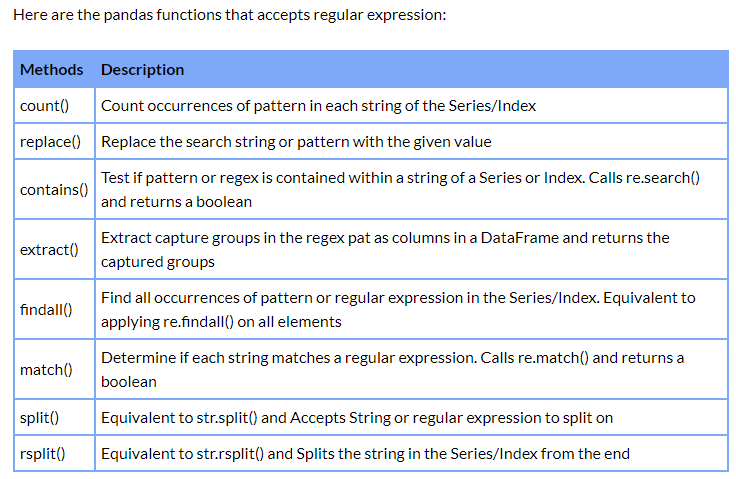



Dataset: Kaggle-World-Happiness-Report-2019
https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019/download

In [103]:
import pandas as pd
df = pd.read_csv('./world-happiness-report-2019.csv')

In [104]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [105]:
"""
Pandas extract

Extract the first 5 characters of each country 
using ^(start of the String)
and {5} (for 5 characters) 
and create a new column first_five_letter

"""
import numpy as np

df['first_five_Letter']=df['Country (region)'].str.extract(r'(^\w{5})')
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,first_five_Letter
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Finla
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Denma
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Norwa
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Icela
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Nethe


In [106]:
"""
Pandas Count
First we are counting the countries starting with character ‘F’. 
It returns two elements but not france because the character ‘f’ here is in lower case.
you can add both Upper and Lower case by using [Ff]

"""

S=pd.Series(['Finland','Colombia','Florida','Japan','Puerto Rico','Russia','france'])

S[S.str.count(r'(^F.*)')==1]

0    Finland
2    Florida
dtype: object

In [107]:
"""
OR

We can use sum() function to find the total elements matching the pattern.
"""

# Total items starting with F
S.str.count(r'(^F.*)').sum()

2

In [108]:
"""
In our Original dataframe we are finding all the Country 
that starts with Character ‘P’ and ‘p’ (both lower and upper case).

Basically we are filtering all the rows which return count > 0.
"""

df[df['Country (region)'].str.count('^[pP].*')>0]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,first_five_Letter
30,Panama,31,121,7.0,48.0,41.0,32.0,104.0,88.0,51.0,33.0,Panam
39,Poland,40,28,76.0,33.0,44.0,52.0,108.0,77.0,41.0,36.0,Polan
62,Paraguay,63,90,1.0,39.0,30.0,34.0,76.0,67.0,90.0,81.0,Parag
64,Peru,65,114,36.0,127.0,77.0,61.0,132.0,126.0,76.0,47.0,NaN
65,Portugal,66,73,97.0,100.0,47.0,37.0,135.0,122.0,39.0,22.0,Portu
66,Pakistan,67,53,130.0,111.0,130.0,114.0,55.0,58.0,110.0,114.0,Pakis
68,Philippines,69,119,42.0,116.0,75.0,15.0,49.0,115.0,97.0,99.0,Phili
109,Palestinian Territories,110,110,128.0,140.0,82.0,134.0,90.0,147.0,112.0,NaN,Pales


In [109]:
"""
Pandas Match
match () function is equivalent to python’s re.match() and returns a boolean value. 
We are finding all the countries in pandas series starting with character ‘P’ (Upper case) .

"""


# Get countries starting with letter P
S=pd.Series(['Finland','Colombia','Florida','Japan','Puerto Rico','Russia','france'])

S[S.str.match(r'(^P.*)')==True]

4    Puerto Rico
dtype: object

In [110]:
"""
Running the same match() method and filtering by Boolean value True 
we get all the Countries starting with ‘P’ in the original dataframe

"""


df[df['Country (region)'].str.match('^P.*')== True]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,first_five_Letter
30,Panama,31,121,7.0,48.0,41.0,32.0,104.0,88.0,51.0,33.0,Panam
39,Poland,40,28,76.0,33.0,44.0,52.0,108.0,77.0,41.0,36.0,Polan
62,Paraguay,63,90,1.0,39.0,30.0,34.0,76.0,67.0,90.0,81.0,Parag
64,Peru,65,114,36.0,127.0,77.0,61.0,132.0,126.0,76.0,47.0,NaN
65,Portugal,66,73,97.0,100.0,47.0,37.0,135.0,122.0,39.0,22.0,Portu
66,Pakistan,67,53,130.0,111.0,130.0,114.0,55.0,58.0,110.0,114.0,Pakis
68,Philippines,69,119,42.0,116.0,75.0,15.0,49.0,115.0,97.0,99.0,Phili
109,Palestinian Territories,110,110,128.0,140.0,82.0,134.0,90.0,147.0,112.0,NaN,Pales


In [111]:
"""
Pandas Replace
Replaces all the occurence of matched pattern in the string.

We want to remove the dash(-) followed by number in the below pandas series object.

The regex checks for a dash(-) followed by a numeric digit (represented by \d) 
and replace that with an empty string 
and the inplace parameter set as True will update the existing series. 

The output is list of countres without the dash and number.
"""

# Remove the dash(-) followed by number from all countries in the Series
S=pd.Series(['Finland-1','Colombia-2','Florida-3','Japan-4','Puerto Rico-5','Russia-6','france-7'])

S.replace('(-\d)','',regex=True, inplace = True)


In [112]:
S

0        Finland
1       Colombia
2        Florida
3          Japan
4    Puerto Rico
5         Russia
6         france
dtype: object

In [113]:
"""
Pandas Findall
It calls re.findall() and find all occurence of matching patterns. 

We are creating a new list of countries which starts 
with character ‘F’ and ‘f’ from the Series. 

The list comprehension checks for all the returned value > 0
and creates a list matching the patterns.
"""

S=pd.Series(['Finland','Colombia','Florida','Japan','Puerto Rico','Russia','france'])
[itm[0] for itm in S.str.findall('^[Ff].*') if len(itm)>0]

['Finland', 'Florida', 'france']

In [114]:
"""
Pandas Contains
It uses re.search() and returns a boolean value. 

In the below regex we are looking for all the countries starting with character ‘F’ 
(using start with metacharacter ^) in the pandas series object.

The result shows True for all countries start with character ‘F’ and False which doesn’t.
"""

S=pd.Series(['Finland','Colombia','Florida','Japan','Puerto Rico','Russia','france'])
S.str.contains('^F.*')

0     True
1    False
2     True
3    False
4    False
5    False
6    False
dtype: bool

In [115]:
"""
n our original dataframe we will filter all the countries starting with character ‘I’ .
We just need to filter all the True values that is returned by contains() function.
"""

df[df['Country (region)'].str.contains('^I.*')==True]


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,first_five_Letter
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Icela
12,Israel,13,14,104.0,69.0,38.0,93.0,74.0,24.0,31.0,11.0,Israe
15,Ireland,16,34,33.0,32.0,6.0,33.0,10.0,9.0,6.0,20.0,Irela
35,Italy,36,31,99.0,123.0,23.0,132.0,128.0,48.0,29.0,7.0,Italy
91,Indonesia,92,108,9.0,104.0,94.0,48.0,129.0,2.0,83.0,98.0,Indon
98,Ivory Coast,99,134,88.0,130.0,137.0,100.0,62.0,114.0,118.0,147.0,Ivory
116,Iran,117,109,109.0,150.0,134.0,117.0,44.0,28.0,54.0,77.0,NaN
125,Iraq,126,147,151.0,154.0,124.0,130.0,66.0,73.0,64.0,107.0,NaN
139,India,140,41,93.0,115.0,142.0,41.0,73.0,65.0,103.0,105.0,India


In [116]:
"""
Pandas Split
This is equivalent to str.split() and accepts regex, 
if no regex passed then the default is \s (for whitespace). 

Here we are splitting the text on white space 
and expands set as True splits that into 3 different columns

You can also specify the param n to Limit number of splits in output
""" 

s = pd.Series(["StatueofLiberty built-on 28-Oct-1886"])
s.str.split(r"\s", n=-1,expand=True)

,0,1,2
0,StatueofLiberty,built-on,28-Oct-1886


In [ ]:
"""
Pandas rsplit
it is equivalent to str.rsplit() 
and the only difference with split() function is that it splits the string from end.

"""

In [ ]:
"""
Conclusion
We have seen how regexp can be used effectively with some the Pandas functions 
and can help to extract, match the patterns in the Series or a Dataframe. 

Especially when you are working with the Text data then Regex is a powerful tool for data extraction,
Cleaning and validation.

"""

## Parte 3)  Pandas Groupby Tutorial


Source: https://kanoki.org/2019/09/04/pandas-groupby-tutorial/


Hope if you are reading this post then you know what is groupby in SQL and how it is being used to aggregate the data of the rows with the same value in one or more column. I was recently working on the Pandas Groupby and found there are lot of useful features which can be used to explore the data and this triggered me to write this post so that anyone with a SQL groupby knowledge can learn the Pandas group by within no time. In this blog I am going to take a dataset and show how we can perform groupby on this data and explore the data further.



In [121]:
"""
Load Data
We are going to use the seaborn exercise data for this tutorial. 

The data represents the type of diet and its corresponding pulse rate measured for the time in mins. 

You can load this data with a simple searborn command and then after some cleanup the data is ready to be used

"""

import seaborn as sns
import pandas as pd

exercise = sns.load_dataset('exercise')
exercise.head(100)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
9,9,4,low fat,80,1 min,rest


In [127]:
exercise.dtypes

Unnamed: 0       int64
id               int64
diet          category
pulse            int64
time          category
kind          category
dtype: object

In [128]:
exercise.drop('Unnamed: 0',inplace=True,axis='columns')

#remove unit 'min'embedded in the data from column 'time'
exercise['time']=exercise['time'].str.replace(' min','')
type(exercise['time'][0])

str

In [129]:
exercise['time']= pd.to_numeric(exercise['time'])

exercise.rename(columns={'time':'time_mins'},inplace=True)
exercise.head()

,id,diet,pulse,time_mins,kind
0,1,low fat,85,1,rest
1,1,low fat,85,15,rest
2,1,low fat,88,30,rest
3,2,low fat,90,1,rest
4,2,low fat,92,15,rest


In [130]:
"""
Pandas Groupby Count
As a first step everyone would be interested to group the data on single or multiple column
and count the number of rows within each group. 

So you can get the count using size or count function.
if you are using the count() function then it will return a dataframe. 

Here we are interested to group on the id and Kind(resting,walking,sleeping etc.) 
when the pulse rate is measured.

You can see for the id: 1 and kind resting the data has 3 rows in it
and for walking and running there are no rows available in the data.

"""

grouped=exercise.groupby(['id','kind'],axis=0)
grouped.count()

diet  pulse  time_mins
id kind                           
1  rest      3.0    3.0        3.0
   walking   NaN    NaN        NaN
   running   NaN    NaN        NaN
2  rest      3.0    3.0        3.0
   walking   NaN    NaN        NaN
...          ...    ...        ...
29 walking   NaN    NaN        NaN
   running   3.0    3.0        3.0
30 rest      NaN    NaN        NaN
   walking   NaN    NaN        NaN
   running   3.0    3.0        3.0

[90 rows x 3 columns]

In [131]:
"""
Basic Aggreggation
Now lets look at the simple aggregations functions that can be applied on the columns for this data. 

So if you have seen this data then the first thing you would be interested to know is 
what is the mean or average pulse rate across each of the diet under each id. 

Here we will first group by id and diet 
and then   use the mean function to get a multi-index dataframe of the groups 
with the mean values for the column pulse and time_mins.

We can easily find it out from this data that diet with low fat gives less pulse rate than the diet with no fat. 

Wow so we cleared the misconception with this data that eating fat rich food is not good for health.

"""

exercise.groupby(['diet']).mean()

,id,pulse,time_mins
diet,,,
no fat,18.0,103.444444,15.333333
low fat,13.0,95.955556,15.333333


In [132]:
exercise['diet'].unique()

[low fat, no fat]
Categories (2, object): [low fat, no fat]

In [133]:
"""
I hope at this point of time you would also be interested to see what is the average pulse for each of the kind.
so lets find it out. 

Looks like resting has lowest mean pulse rate 
and running has the highest which was expected.

exercise.groupby(['kind']).mean()


"""

exercise.groupby(['kind']).mean()

,id,pulse,time_mins
kind,,,
rest,5.5,90.833333,15.333333
walking,15.5,95.200000,15.333333
running,25.5,113.066667,15.333333


In [ ]:
"""
There are other aggregating functions like sum, min, max, std,var etc.
We will look into some of these functions later in the post. You can check these other functions




Aggregating functions

"""


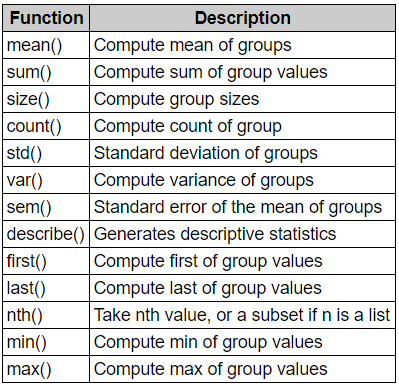

In [134]:
"""
The result of the aggregation will have the group names as the new index along the grouped axis.

In the case of multiple keys, the result is a Multi-Index by default, 
though this can be changed by using the as_index option. 

You can set the as_index parameter as False

"""

exercise.groupby(['id','diet'],as_index=False).agg(sum).head()

,id,diet,pulse,time_mins
0,1,no fat,NaN,NaN
1,1,low fat,258.0,46.0
2,2,no fat,NaN,NaN
3,2,low fat,275.0,46.0
4,3,no fat,NaN,NaN


In [135]:
exercise.groupby(['id','diet'],as_index=True).agg(sum).head()

pulse  time_mins
id diet                     
1  no fat     NaN        NaN
   low fat  258.0       46.0
2  no fat     NaN        NaN
   low fat  275.0       46.0
3  no fat     NaN        NaN

In [136]:
"""
or

You can also do a reset_index
"""
exercise.groupby(['id','diet']).sum().head().reset_index()

,id,diet,pulse,time_mins
0,1,no fat,NaN,NaN
1,1,low fat,258.0,46.0
2,2,no fat,NaN,NaN
3,2,low fat,275.0,46.0
4,3,no fat,NaN,NaN


In [137]:
"""
Describe
if you want to generate a descriptive statistics that summarize
the count, mean, std deviation, percentile and max values of a datasets distribution 
then simply use the describe function on the groupby object
"""

grouped=exercise.groupby(['id','diet'])
grouped.describe().head()

pulse                                                    time_mins  \
           count       mean       std   min   25%   50%   75%   max     count   
id diet                                                                         
1  low fat   3.0  86.000000  1.732051  85.0  85.0  85.0  86.5  88.0       3.0   
2  low fat   3.0  91.666667  1.527525  90.0  91.0  92.0  92.5  93.0       3.0   
3  low fat   3.0  96.000000  1.732051  94.0  95.5  97.0  97.0  97.0       3.0   
4  low fat   3.0  81.666667  1.527525  80.0  81.0  82.0  82.5  83.0       3.0   
5  low fat   3.0  91.333333  0.577350  91.0  91.0  91.0  91.5  92.0       3.0   

                                                              
                 mean        std  min  25%   50%   75%   max  
id diet                                                       
1  low fat  15.333333  14.502873  1.0  8.0  15.0  22.5  30.0  
2  low fat  15.333333  14.502873  1.0  8.0  15.0  22.5  30.0  
3  low fat  15.333333  14.502873  1.0  8.0  15.0  22.5  30.0  
4  low fat  15.333333  14.502873  1.0  8.0  15.0  22.5  30.0  
5  low fat  15.333333  14.502873  1.0  8.0  15.0  22.5  30.0

In [138]:
"""
Pandas Groupby Multiple Functions

With a grouped series or a column of the group you can also use a list of aggregate function 
or a dict of functions to do aggregation with 
and the result would be a hierarchical index dataframe

"""

exercise.groupby(['id','diet'])['pulse'].agg(['max','mean','min']).head()

max       mean   min
id diet                          
1  no fat    NaN        NaN   NaN
   low fat  88.0  86.000000  85.0
2  no fat    NaN        NaN   NaN
   low fat  93.0  91.666667  90.0
3  no fat    NaN        NaN   NaN

In [139]:
"""
Similarly on a groupby object you can pass list of functions 
and it will give the aggregated results for all the columns in the group
"""

exercise.groupby(['id','diet']).agg(['max','mean','min']).head()

pulse                  time_mins                
             max       mean   min       max       mean  min
id diet                                                    
1  no fat    NaN        NaN   NaN       NaN        NaN  NaN
   low fat  88.0  86.000000  85.0      30.0  15.333333  1.0
2  no fat    NaN        NaN   NaN       NaN        NaN  NaN
   low fat  93.0  91.666667  90.0      30.0  15.333333  1.0
3  no fat    NaN        NaN   NaN       NaN        NaN  NaN

In [140]:
exercise.columns

Index(['id', 'diet', 'pulse', 'time_mins', 'kind'], dtype='object')

In [143]:
"""
Lambda function for Aggreggation

You can also use a lambda function for aggregation with the groupby object.
So here I am looking for a lambda function on the groupby 
which will give me the diff of max and min value in each group for both the columns pulse and time. 

The output will be a multi-index dataframe object and also renaming the column to diff

"""
#grouped = exercise.groupby(['id','diet']).agg([lambda x: x.max() - x.min()]).rename(columns={'&lt;lambda>': 'diff'})
grouped = exercise.groupby(['id','diet']).agg([lambda x: x.max() - x.min()]).rename(columns={'<lambda>': 'diff'})
grouped.head()

pulse time_mins
            diff      diff
id diet                   
1  no fat    NaN       NaN
   low fat   3.0      29.0
2  no fat    NaN       NaN
   low fat   3.0      29.0
3  no fat    NaN       NaN

In [144]:
"""
Pandas groupby aggregate multiple columns using Named Aggregation

As per the Pandas Documentation,To support column-specific aggregation with control over the output column names,
pandas accepts the special syntax in GroupBy.agg(), known as “named aggregation”, where:

1. The keywords are the output column names

2. The values are tuples whose first element is the column to select 
and the second element is the aggregation to apply to that column. 
Pandas provides the pandas.NamedAgg namedtuple with the fields [‘column’, ‘aggfunc’] 
to make it clearer what the arguments are. 
As usual, the aggregation can be a callable or a string alias.


So we can specify for each column what is the aggregation function we want to apply and give a customize name to it.
"""

import numpy as np
exercise.groupby(['id','diet']).agg(min_pulse=pd.NamedAgg(column='pulse', aggfunc='min'),
                                    max_time=pd.NamedAgg(column='time_mins', aggfunc='max'),
                                    average_pulse=pd.NamedAgg(column='pulse', aggfunc=np.mean)).head(10)

min_pulse  max_time  average_pulse
id diet                                       
1  no fat         NaN       NaN            NaN
   low fat       85.0      30.0      86.000000
2  no fat         NaN       NaN            NaN
   low fat       90.0      30.0      91.666667
3  no fat         NaN       NaN            NaN
   low fat       94.0      30.0      96.000000
4  no fat         NaN       NaN            NaN
   low fat       80.0      30.0      81.666667
5  no fat         NaN       NaN            NaN
   low fat       91.0      30.0      91.333333

In [145]:
"""
Column Indexing
The groupby object can be indexed by a column and the result will be a Series groupby object. 

Let’s use series groupby object time_mins and calculate its mean. 

So we get the total time for each of the kind.
"""

exercise.groupby('kind')['time_mins'].mean()

kind
rest       15.333333
walking    15.333333
running    15.333333
Name: time_mins, dtype: float64

In [146]:
exercise.groupby('kind')['pulse'].mean()

kind
rest        90.833333
walking     95.200000
running    113.066667
Name: pulse, dtype: float64

In [150]:
"""
Pandas groupby get_group

Another useful method to select a group from the groupby object 
so from the groupby object we want to get kind – walking and it gives a dataframe with all rows of walking group. 

Basically it gets you all the rows of the group you are seeking for

"""

grouped=exercise.groupby('kind')
grouped.head()

,id,diet,pulse,time_mins,kind
0,1,low fat,85,1,rest
1,1,low fat,85,15,rest
2,1,low fat,88,30,rest
3,2,low fat,90,1,rest
4,2,low fat,92,15,rest
30,11,low fat,86,1,walking
31,11,low fat,86,15,walking
32,11,low fat,84,30,walking
33,12,low fat,93,1,walking
34,12,low fat,103,15,walking


In [151]:
grouped.get_group('walking').head()

,id,diet,pulse,time_mins,kind
30,11,low fat,86,1,walking
31,11,low fat,86,15,walking
32,11,low fat,84,30,walking
33,12,low fat,93,1,walking
34,12,low fat,103,15,walking


In [152]:
"""
for an object grouped on multiple columns:
"""

grouped=exercise.groupby(['kind','diet'])

grouped.get_group(('walking','no fat')).head()

,id,diet,pulse,time_mins,kind
45,16,no fat,84,1,walking
46,16,no fat,86,15,walking
47,16,no fat,89,30,walking
48,17,no fat,103,1,walking
49,17,no fat,109,15,walking


In [153]:
"""
Iterating groupby
if you want to iterate through each group for some manual operation 
then you can use something like this and it will return either a series or dataframe

"""

for name, group in grouped:
   print(name)
   print(group)

('rest', 'no fat')
    id    diet  pulse  time_mins  kind
15   6  no fat     83          1  rest
16   6  no fat     83         15  rest
17   6  no fat     84         30  rest
18   7  no fat     87          1  rest
19   7  no fat     88         15  rest
20   7  no fat     90         30  rest
21   8  no fat     92          1  rest
22   8  no fat     94         15  rest
23   8  no fat     95         30  rest
24   9  no fat     97          1  rest
25   9  no fat     99         15  rest
26   9  no fat     96         30  rest
27  10  no fat    100          1  rest
28  10  no fat     97         15  rest
29  10  no fat    100         30  rest
('rest', 'low fat')
    id     diet  pulse  time_mins  kind
0    1  low fat     85          1  rest
1    1  low fat     85         15  rest
2    1  low fat     88         30  rest
3    2  low fat     90          1  rest
4    2  low fat     92         15  rest
5    2  low fat     93         30  rest
6    3  low fat     97          1  rest
7    3  low fat  

In [154]:
"""
Pandas SQL groupby Having

you can query the multi-index dataframe using query function or use filter.

Read this blog on how to use filters on groupby object
https://kanoki.org/2019/08/22/pandas-transform-and-filter/

"""

grouped=exercise.groupby(['id','diet']).agg('count').head()
grouped.head()

pulse  time_mins  kind
id diet                           
1  no fat     NaN        NaN   NaN
   low fat    3.0        3.0   3.0
2  no fat     NaN        NaN   NaN
   low fat    3.0        3.0   3.0
3  no fat     NaN        NaN   NaN

In [155]:
# Same as SQL having
grouped.query('pulse > 2')

,,pulse,time_mins,kind
id,diet,,,
1,low fat,3.0,3.0,3.0
2,low fat,3.0,3.0,3.0


In [156]:
"""
Groupby Cumulative Sum
So you want to do a cumulative sum of all the pulse and time_mins for each group,
which means to add up those column values for each group

"""

exercise.groupby(['id','diet']).agg(sum).groupby('diet').cumsum()

pulse  time_mins
id diet                      
1  no fat      NaN        NaN
   low fat   258.0       46.0
2  no fat      NaN        NaN
   low fat   533.0       92.0
3  no fat      NaN        NaN
   low fat   821.0      138.0
4  no fat      NaN        NaN
   low fat  1066.0      184.0
5  no fat      NaN        NaN
   low fat  1340.0      230.0
6  no fat    250.0       46.0
   low fat     NaN        NaN
7  no fat    515.0       92.0
   low fat     NaN        NaN
8  no fat    796.0      138.0
   low fat     NaN        NaN
9  no fat   1088.0      184.0
   low fat     NaN        NaN
10 no fat   1385.0      230.0
   low fat     NaN        NaN
11 no fat      NaN        NaN
   low fat  1596.0      276.0
12 no fat      NaN        NaN
   low fat  1896.0      322.0
13 no fat      NaN        NaN
   low fat  2171.0      368.0
14 no fat      NaN        NaN
   low fat  2462.0      414.0
15 no fat      NaN        NaN
   low fat  2742.0      460.0
16 no fat   1644.0      276.0
   low fat     NaN        NaN
17 no fat   1946.0      322.0
   low fat     NaN        NaN
18 no fat   2235.0      368.0
   low fat     NaN        NaN
19 no fat   2530.0      414.0
   low fat     NaN        NaN
20 no fat   2839.0      460.0
   low fat     NaN        NaN
21 no fat      NaN        NaN
   low fat  3043.0      506.0
22 no fat      NaN        NaN
   low fat  3357.0      552.0
23 no fat      NaN        NaN
   low fat  3659.0      598.0
24 no fat      NaN        NaN
   low fat  3998.0      644.0
25 no fat      NaN        NaN
   low fat  4318.0      690.0
26 no fat   3203.0      506.0
   low fat     NaN        NaN
27 no fat   3569.0      552.0
   low fat     NaN        NaN
28 no fat   3936.0      598.0
   low fat     NaN        NaN
29 no fat   4295.0      644.0
   low fat     NaN        NaN
30 no fat   4655.0      690.0
   low fat     NaN        NaN

In [166]:
grouped.head()

pulse  time_mins  kind
id diet                           
1  no fat     NaN        NaN   NaN
   low fat    3.0        3.0   3.0
2  no fat     NaN        NaN   NaN
   low fat    3.0        3.0   3.0
3  no fat     NaN        NaN   NaN

In [165]:
"""
Filtering Multi-index Columns

There is a small work around for filtering the multi-index grouped dataframe. 

Suppose you want to get all the rows where pulse max,min difference is greater than 10 
and time_mins max value is greater than or equal to 30

"""


###########################3check code ########################3

grouped[(grouped[('pulse','diff')]>10) &amp; (grouped[('time_mins','max')]>=30)]

SyntaxError: invalid syntax (<ipython-input-165-5ff6a008217f>, line 11)

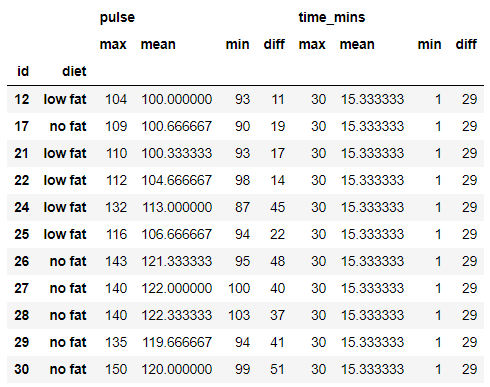

In [ ]:
"""
Transform and Filter
Using transform you can create a new column with the aggregated data and get your original dataframe back. 

Whereas filter can be used like having in SQL. 

Check detailed blog which talks about how to use Transform and Filter with groupby:
https://kanoki.org/2019/08/22/pandas-transform-and-filter/
"""

In [168]:
"""
Groupby Apply Function
We can also use apply and pass a function to each group in the groupby object. 
Say you want to half the pulse-rate in each group, 
so we can group it by id first and then use apply and pass our customized function 
so that it will return a dataframe with all the rows of the group and their halved pulse rate.

"""

def divide_by_half(x):
    # x is a DataFrame of group values
    x['pulse']=x['pulse']/2
    return x

#exercise.groupby('id').apply(norm_by_data2)
exercise.groupby('id').apply(divide_by_half)


,id,diet,pulse,time_mins,kind
0,1,low fat,42.5,1,rest
1,1,low fat,42.5,15,rest
2,1,low fat,44.0,30,rest
3,2,low fat,45.0,1,rest
4,2,low fat,46.0,15,rest
5,2,low fat,46.5,30,rest
6,3,low fat,48.5,1,rest
7,3,low fat,48.5,15,rest
8,3,low fat,47.0,30,rest
9,4,low fat,40.0,1,rest


In [169]:
"""
Pandas groupby aggregate to list

Many a times we have seen instead of applying aggregation function
we want the values of each group to be bind in a list. 

So if you want to list of all the time_mins in each group by id and diet
then here is how you can do it

"""
exercise.groupby(['id','diet'])['time_mins'].apply(list)

id  diet   
1   no fat             NaN
    low fat    [1, 15, 30]
2   no fat             NaN
    low fat    [1, 15, 30]
3   no fat             NaN
    low fat    [1, 15, 30]
4   no fat             NaN
    low fat    [1, 15, 30]
5   no fat             NaN
    low fat    [1, 15, 30]
6   no fat     [1, 15, 30]
    low fat            NaN
7   no fat     [1, 15, 30]
    low fat            NaN
8   no fat     [1, 15, 30]
    low fat            NaN
9   no fat     [1, 15, 30]
    low fat            NaN
10  no fat     [1, 15, 30]
    low fat            NaN
11  no fat             NaN
    low fat    [1, 15, 30]
12  no fat             NaN
    low fat    [1, 15, 30]
13  no fat             NaN
    low fat    [1, 15, 30]
14  no fat             NaN
    low fat    [1, 15, 30]
15  no fat             NaN
    low fat    [1, 15, 30]
16  no fat     [1, 15, 30]
    low fat            NaN
17  no fat     [1, 15, 30]
    low fat            NaN
18  no fat     [1, 15, 30]
    low fat            NaN
19  no fat     [

In [170]:
"""
Conditional Group by count

This is an interesting one. 

Suppose you want to group the data on id and diet 
and want to count all the pulse which is equal to 85
"""

exercise.groupby(['id','diet'])['pulse'].apply(lambda x: x[x == 85].count())


id  diet   
1   no fat     NaN
    low fat    2.0
2   no fat     NaN
    low fat    0.0
3   no fat     NaN
    low fat    0.0
4   no fat     NaN
    low fat    0.0
5   no fat     NaN
    low fat    0.0
6   no fat     0.0
    low fat    NaN
7   no fat     0.0
    low fat    NaN
8   no fat     0.0
    low fat    NaN
9   no fat     0.0
    low fat    NaN
10  no fat     0.0
    low fat    NaN
11  no fat     NaN
    low fat    0.0
12  no fat     NaN
    low fat    0.0
13  no fat     NaN
    low fat    0.0
14  no fat     NaN
    low fat    0.0
15  no fat     NaN
    low fat    0.0
16  no fat     0.0
    low fat    NaN
17  no fat     0.0
    low fat    NaN
18  no fat     0.0
    low fat    NaN
19  no fat     0.0
    low fat    NaN
20  no fat     0.0
    low fat    NaN
21  no fat     NaN
    low fat    0.0
22  no fat     NaN
    low fat    0.0
23  no fat     NaN
    low fat    0.0
24  no fat     NaN
    low fat    0.0
25  no fat     NaN
    low fat    0.0
26  no fat     0.0
    low fat    NaN
